In [36]:
# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('Cleaned_Spotify.csv')
data.drop('release_date',axis=1)
data.isnull()
data.dropna()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,1,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,2,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,3,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,4,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928,0.0926,108.003,0.7200,1928
4,5,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165706,169905,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020,0.1430,100.012,0.3060,2020
165707,169906,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020,0.0403,128.000,0.2700,2020
165708,169907,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020,0.1050,123.700,0.1530,2020
165709,169908,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020,0.0385,129.916,0.4720,2020


In [38]:
features = ['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'loudness',
 'tempo', 'year']

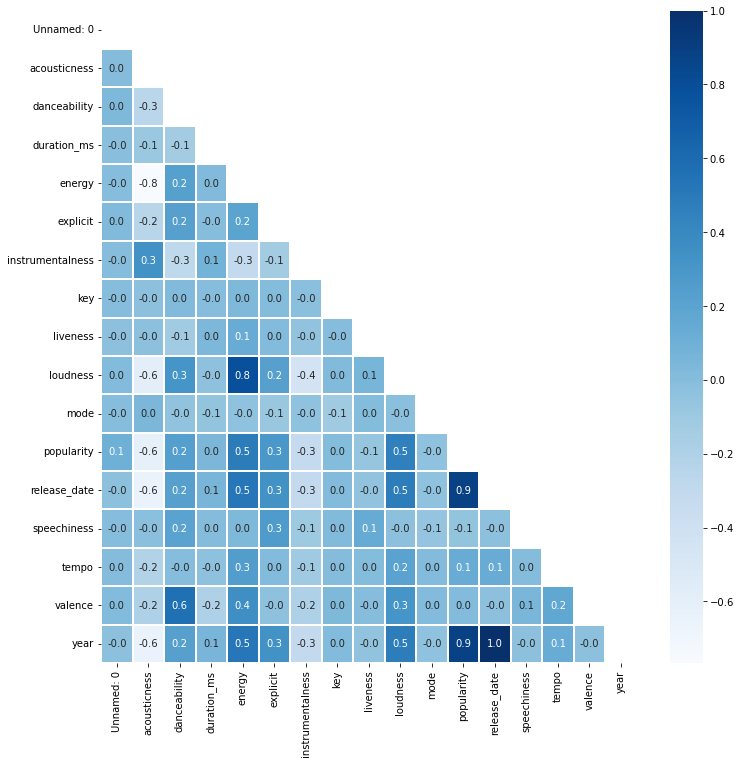

In [39]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show()

In [40]:
X = data[features]
y = data['popularity']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(np.mean(y_train), np.mean(y), np.mean(y_test))

32.06351888410907 32.05868650843939 32.047411192018345


In [28]:
#Polynomial Regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
param_poly = {'polynomialfeatures__degree' :  range(1,6)  } 
grid_poly = PolynomialFeatures()
lr_poly = LinearRegression()
pipe_grid_poly = make_pipeline(  grid_poly  ,  lr_poly )

grid_poly_reg = GridSearchCV(pipe_grid_poly, param_poly, cv = 5)

grid_poly_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': range(1, 6)})

In [29]:

y_test_pred_grid = grid_poly_reg.predict(X_test)
y_test_pred_grid
np.mean((y_test - y_test_pred_grid)**2)

96.8767606623674

In [42]:
print('Best hyperparameter chosen:',grid_poly_reg.best_params_)
print('Score based on which model is chosen:', grid_poly_reg.best_score_)
print('Unbiased performance in R2:', grid_poly_reg.score(X_test, y_test))


Best hyperparameter chosen: {'polynomialfeatures__degree': 5}
Score based on which model is chosen: 0.7862135433031932
Unbiased performance in R2: 0.7873869966397973


In [43]:
grid_poly_reg.best_score_

0.7862135433031932

In [44]:
#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#print('Precision score:', precision_score(y_test, y_test_pred_grid))
#print('Recall score:', recall_score(y_test, y_test_pred_grid))
#print('Accuracy score:', accuracy_score(y_test, y_test_pred_grid))
#print('F1 score:', f1_score(y_test, y_test_pred_grid))

In [45]:
grid_poly_reg.best_estimator_.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=5),
 'linearregression': LinearRegression()}

In [46]:
#Ridge
from sklearn.linear_model import Ridge
base_ridge = Ridge(alpha = 1)
base_ridge.fit(X_train, y_train)
base_ridge.coef_, base_ridge.intercept_

(array([-4.50785504e+00,  3.81823742e+00, -2.70455125e+00, -2.03435562e+00,
         7.73670810e-02,  4.26327078e-03,  6.90681781e-01]),
 -1331.77171528507)

In [47]:
ridge_params = { 'alpha'  : [0.001, 0.01, 0.1, 1, 10,100]  }
my_ridge = Ridge() 
grid_ridge_cv = GridSearchCV(my_ridge, ridge_params, cv = 5)
grid_ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [48]:
print('Unbiased performance in R2:', grid_ridge_cv.score(X_test, y_test))

print('Score based on which model is chosen:', grid_ridge_cv.best_score_)

print('Best hyperparameter chosen:', grid_ridge_cv.best_params_)

grid_ridge_cv.best_estimator_.coef_, grid_ridge_cv.best_estimator_.intercept_

Unbiased performance in R2: 0.7747410879911404
Score based on which model is chosen: 0.7744284623541738
Best hyperparameter chosen: {'alpha': 10}


(array([-4.49689779e+00,  3.80919053e+00, -2.68651054e+00, -2.03483701e+00,
         7.71175073e-02,  4.25612476e-03,  6.90727724e-01]),
 -1331.8739256248048)

In [49]:
#Lasso
from sklearn.linear_model import Lasso

In [50]:
lasso_params = { 'alpha'  : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]  }
my_lasso = Lasso() # estimator
grid_lasso_cv = GridSearchCV(my_lasso, lasso_params, cv = 5)
grid_lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]})

In [51]:
print('Unbiased performance in R2:', grid_lasso_cv.score(X_test, y_test))
print('Score based on which model is chosen:', grid_lasso_cv.best_score_)
print('Best hyperparameter chosen:', grid_lasso_cv.best_params_)
grid_lasso_cv.best_estimator_.coef_, grid_lasso_cv.best_estimator_.intercept_

Unbiased performance in R2: 0.7747404873149469
Score based on which model is chosen: 0.7744283990937463
Best hyperparameter chosen: {'alpha': 0.0001}


(array([-4.50601837e+00,  3.81645665e+00, -2.70011619e+00, -2.03379030e+00,
         7.72962261e-02,  4.26112037e-03,  6.90687664e-01]),
 -1331.78612906313)